In [167]:


import keras

Note: you may need to restart the kernel to use updated packages.


In [168]:
from keras.models import Sequential


In [169]:
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape

In [170]:
from keras.preprocessing.image import ImageDataGenerator

In [171]:
from keras.callbacks import LearningRateScheduler

In [172]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten()) 
model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(43))
model.add(Activation('softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [173]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 15

In [174]:
import pickle

In [175]:
with open('ToySet3_rgb.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')

In [176]:

data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)

# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

# Showing loaded data from file
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)

x_train: (430, 32, 32, 3)
y_train: (430, 43)
x_validation: (430, 32, 32, 3)
y_validation: (430, 43)
x_test: (430, 32, 32, 3)
y_test: (430,)
labels: 43


In [177]:

h = model.fit(data['x_train'][:540], data['y_train'][:540],
              batch_size=5, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)

Train on 430 samples, validate on 430 samples
Epoch 1/15
430/430 [==============================] - 2s 4ms/step - loss: 6.2333 - accuracy: 0.0605 - val_loss: 3.6888 - val_accuracy: 0.0907
Epoch 2/15
430/430 [==============================] - 1s 3ms/step - loss: 3.1445 - accuracy: 0.2116 - val_loss: 3.3547 - val_accuracy: 0.1605
Epoch 3/15
430/430 [==============================] - 1s 3ms/step - loss: 2.3775 - accuracy: 0.3977 - val_loss: 3.1192 - val_accuracy: 0.2140
Epoch 4/15
430/430 [==============================] - 2s 4ms/step - loss: 1.7050 - accuracy: 0.5651 - val_loss: 3.0245 - val_accuracy: 0.3047
Epoch 5/15
430/430 [==============================] - 2s 4ms/step - loss: 1.2577 - accuracy: 0.6651 - val_loss: 2.9179 - val_accuracy: 0.3465
Epoch 6/15
430/430 [==============================] - 2s 4ms/step - loss: 0.9855 - accuracy: 0.7698 - val_loss: 2.7949 - val_accuracy: 0.3767
Epoch 7/15
430/430 [==============================] - 1s 3ms/step - loss: 0.7127 - accuracy: 0.8488 - 

In [178]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_pred = model.predict(data['x_validation'])
y_pred = np.argmax(Y_pred, axis=1)
y_val = np.argmax(data['y_validation'],axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_val, y_pred))
print('Classification Report')
#target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(y_val, y_pred))

Confusion Matrix
[[1 1 0 ... 0 0 0]
 [2 2 1 ... 0 0 0]
 [1 2 1 ... 0 0 0]
 ...
 [0 4 0 ... 5 0 0]
 [0 0 0 ... 0 1 3]
 [0 0 0 ... 1 1 8]]
Classification Report
              precision    recall  f1-score   support

           0       0.25      0.10      0.14        10
           1       0.12      0.20      0.15        10
           2       0.33      0.10      0.15        10
           3       0.25      0.50      0.33        10
           4       0.33      0.60      0.43        10
           5       0.36      0.50      0.42        10
           6       0.78      0.70      0.74        10
           7       0.00      0.00      0.00        10
           8       0.24      0.50      0.32        10
           9       0.25      0.10      0.14        10
          10       0.75      0.60      0.67        10
          11       1.00      0.50      0.67        10
          12       1.00      0.70      0.82        10
          13       0.89      0.80      0.84        10
          14       0.69      0

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [179]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt

In [180]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(43):
    fpr[i], tpr[i], _ = roc_curve(data['y_validation'][:,i], Y_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(data['y_validation'].ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

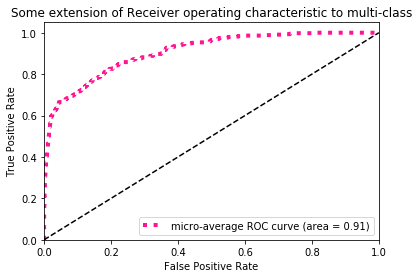

In [181]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(43)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(43):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 43

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

'''
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
'''
'''
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(43), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    '''

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [182]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(43):
    precision[i], recall[i], _ = precision_recall_curve(data['y_validation'][:,i], Y_pred[:,i])
    average_precision[i] = average_precision_score(data['y_validation'][:,i], Y_pred[:,i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(data['y_validation'].ravel(),
    Y_pred.ravel())
average_precision["micro"] = average_precision_score(data['y_validation'], Y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.47


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.33')

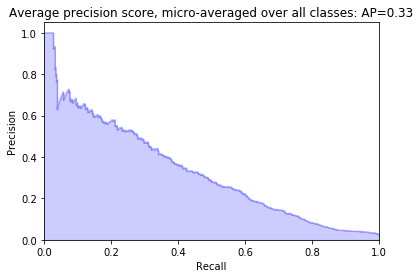

In [166]:
from inspect import signature
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})


plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))